## Wanneer laad ik mijn smartphone op?

### Set up


We weten dat de batterijlading van een smartphone sterk daalt als je hem veel gebruikt. Nu willen we dit in kaart brengen. We hebben een aantal testexemplaren volledig opgeladen en geven deze mee met personen die de smartphones gebruiken. Wanneer de batterijlading op 20% komt, noteren de personen het aantal uren standby en het aantal uren gebruikt. Je vindt deze data in "smartphones.csv".

1. lees de data in. Hoeveel rijen zijn er?

In [1]:
import numpy as np
import pandas as pd

smartphones = pd.read_csv('data/smartphones.csv', sep=',', decimal='.')

display(smartphones)

,usage,standby
0,2.883495,93.622233
1,7.009684,25.832790
2,0.966821,75.322096
3,4.579412,63.088735
4,1.903283,94.866359
...,...,...
95,4.635983,70.667516
96,5.428050,70.520763
97,4.206757,61.587526
98,4.151233,82.306191


2. Bereken per toestel het totaal aantal uren dat deze aan stond tot 20% (gebruikte uren en standby
uren). Hoeveel uren vind je voor het eerste toestel?

In [2]:
smartphones['totaal_uren'] = smartphones['standby'] + smartphones['usage']
display(smartphones)

,usage,standby,totaal_uren
0,2.883495,93.622233,96.505727
1,7.009684,25.832790,32.842474
2,0.966821,75.322096,76.288917
3,4.579412,63.088735,67.668147
4,1.903283,94.866359,96.769642
...,...,...,...
95,4.635983,70.667516,75.303499
96,5.428050,70.520763,75.948813
97,4.206757,61.587526,65.794284
98,4.151233,82.306191,86.457424


3. We zoeken nu een verband tussen het aantal uren dat de smartphone gebruikt werd en het totaal
aantal uren totdat de batterij op 20% stond. Maak eerst een scatterplot van deze 2 variabelen. Wat
zie je?

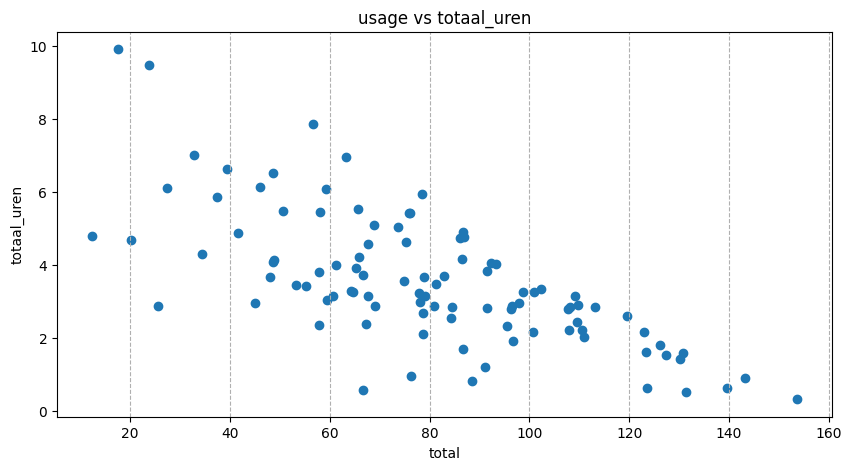

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(smartphones.totaal_uren, smartphones.usage)
ax.set_title('usage vs totaal_uren')
ax.set_xlabel('total')
ax.set_ylabel('totaal_uren')
_ = ax.grid(linestyle='--', axis='x')

4. Bereken de correlatie volgens Pearson en Kendall. Wat zeggen deze waarden?

In [9]:
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

kendall = smartphones.corr(method='kendall')
display(kendall)
spearman = smartphones.corr(method='spearman')
display(spearman)

,usage,standby,totaal_uren
usage,1.000000,-0.541010,-0.517576
standby,-0.541010,1.000000,0.976566
totaal_uren,-0.517576,0.976566,1.000000


,usage,standby,totaal_uren
usage,1.000000,-0.726337,-0.699526
standby,-0.726337,1.000000,0.998668
totaal_uren,-0.699526,0.998668,1.000000


5. Teken de regressielijn bij de scatterplot. Wat zijn de waarden voor slope en intercept?

Text(0.5, 0, 'totaal_uren')

Text(0, 0.5, 'standby')

Text(0.5, 1.0, 'Scatterplot met regressielijn')

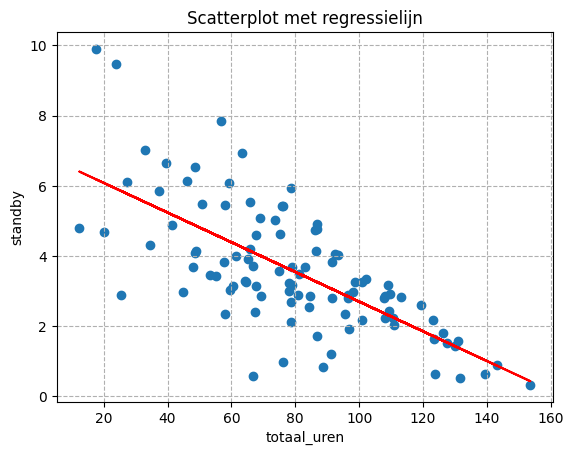

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Berekenen van de slope en intercept
slope, intercept = np.polyfit(smartphones.totaal_uren, smartphones.usage, 1)

# Teken de scatterplot en regressielijn
plt.scatter(smartphones.totaal_uren, smartphones.usage)
plt.plot(smartphones.totaal_uren, slope*smartphones.totaal_uren + intercept, color='red')

# Voeg labels en titels toe
plt.grid(True, linestyle='--')
plt.xlabel('totaal_uren')
plt.ylabel('standby')
plt.title('Scatterplot met regressielijn')

# Toon de plot
plt.show()

6. Wat is de waarde van R²? Wat is de betekenis?

In [23]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(smartphones.standby, smartphones.totaal_uren)
y_hat = model.predict(smartphones.standby)  # Voorspellingen maken

r2_score(smartphones.standby, y_hat) # Kan je altijd gebruiken
#of
model.score(smartphones.totaal_uren, smartphones.standby)# Kan je gebruiken als je een model hebt

ImportError: DLL load failed while importing _csr_polynomial_expansion: De bestandsnaam of -extensie is te lang.

7. Wat is de standaardschattingsfout? Wat betekent dit?

8. Als iemand een smartphone gedurende 3 uur nodig heeft, hoe lang zal het dan duren vooraleer de
smartphone opgeladen moet worden?

9. Stel dat je een verband zoekt tussen het gebruikspercentage en de totale tijd voordat je moet
opladen. Zoek de juiste variabelen en maak een scatterplot. Wat zie je? Kan je hiervoor lineaire
regressie gebruiken? Waarom wel of niet? Welk regressiemodel is in dit geval het beste? Wat is
dan de uiteindelijke formule voor het model?